In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets 

In [42]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('insurance_data.csv')

In [43]:
# first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# number of rows and columns
df.shape

(1338, 7)

In [45]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\dell\AppData\Local\Temp\ipykernel_44416\1989520026.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


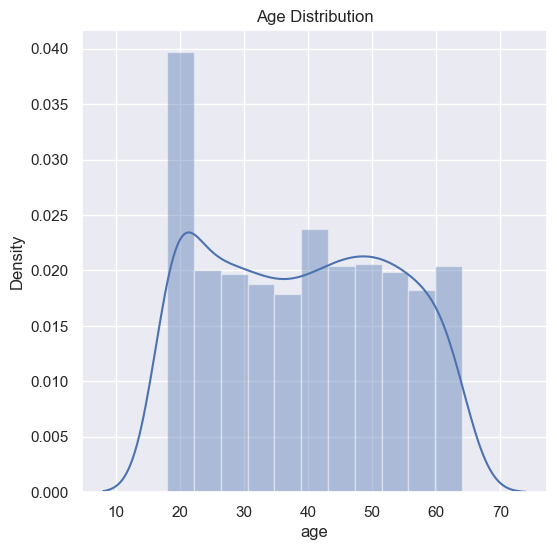

In [48]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

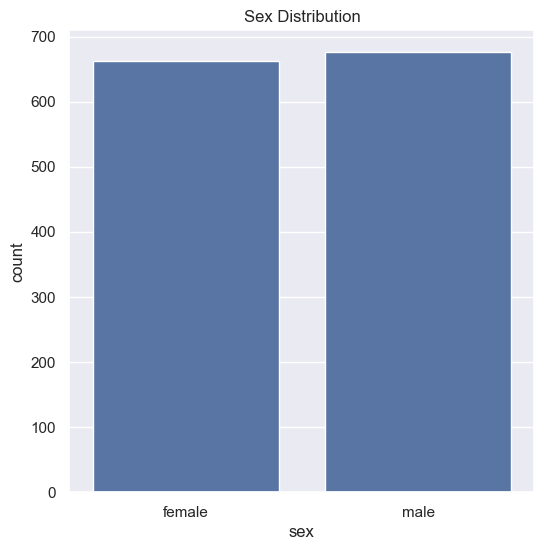

In [49]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [50]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_44416\1472460213.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


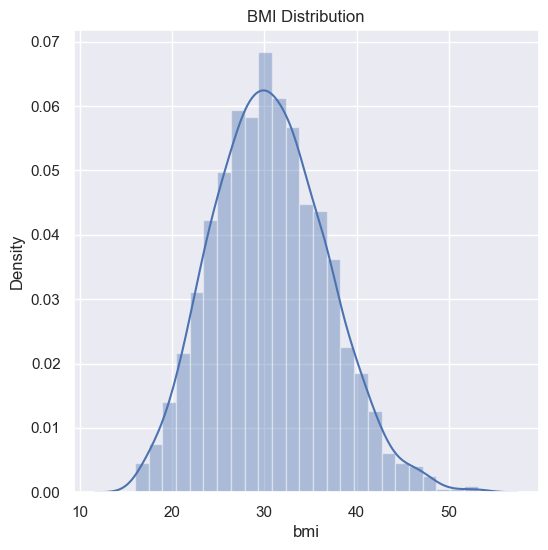

In [51]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

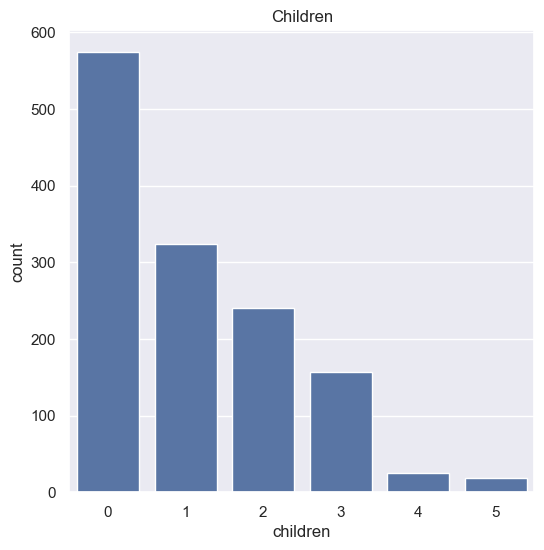

In [52]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [53]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

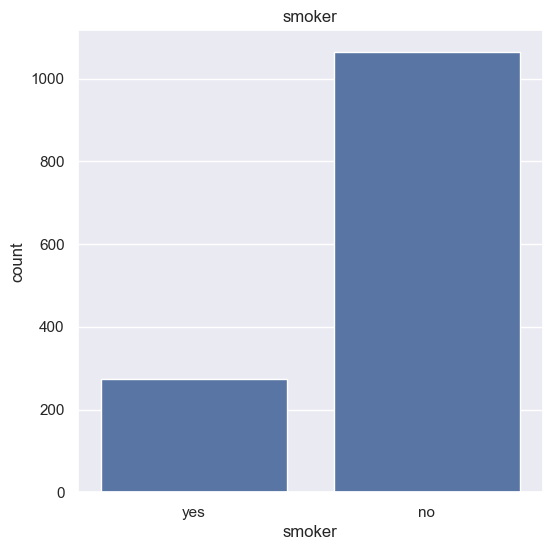

In [54]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [55]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

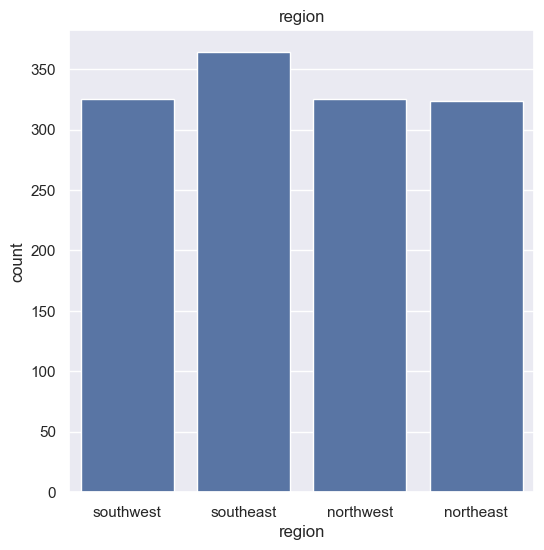

In [56]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [57]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_44416\4141191176.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


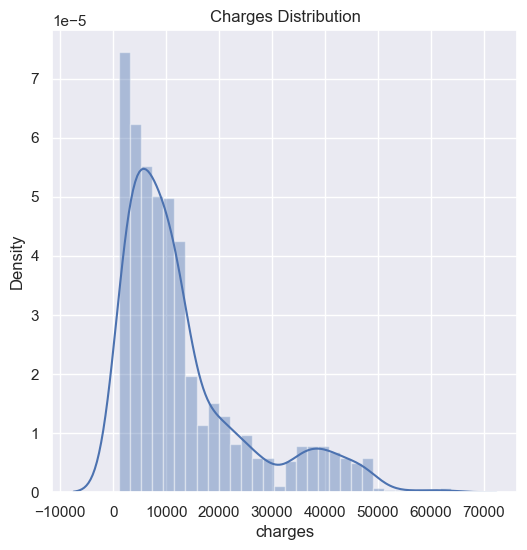

In [58]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

## **Encoding the categorical features**

In [59]:
# encoding sex column
df.replace({'sex':{'male':1,'female':0}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_44416\1697953663.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':1,'female':0}}, inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_44416\1697953663.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_44416\1697953663.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expl

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


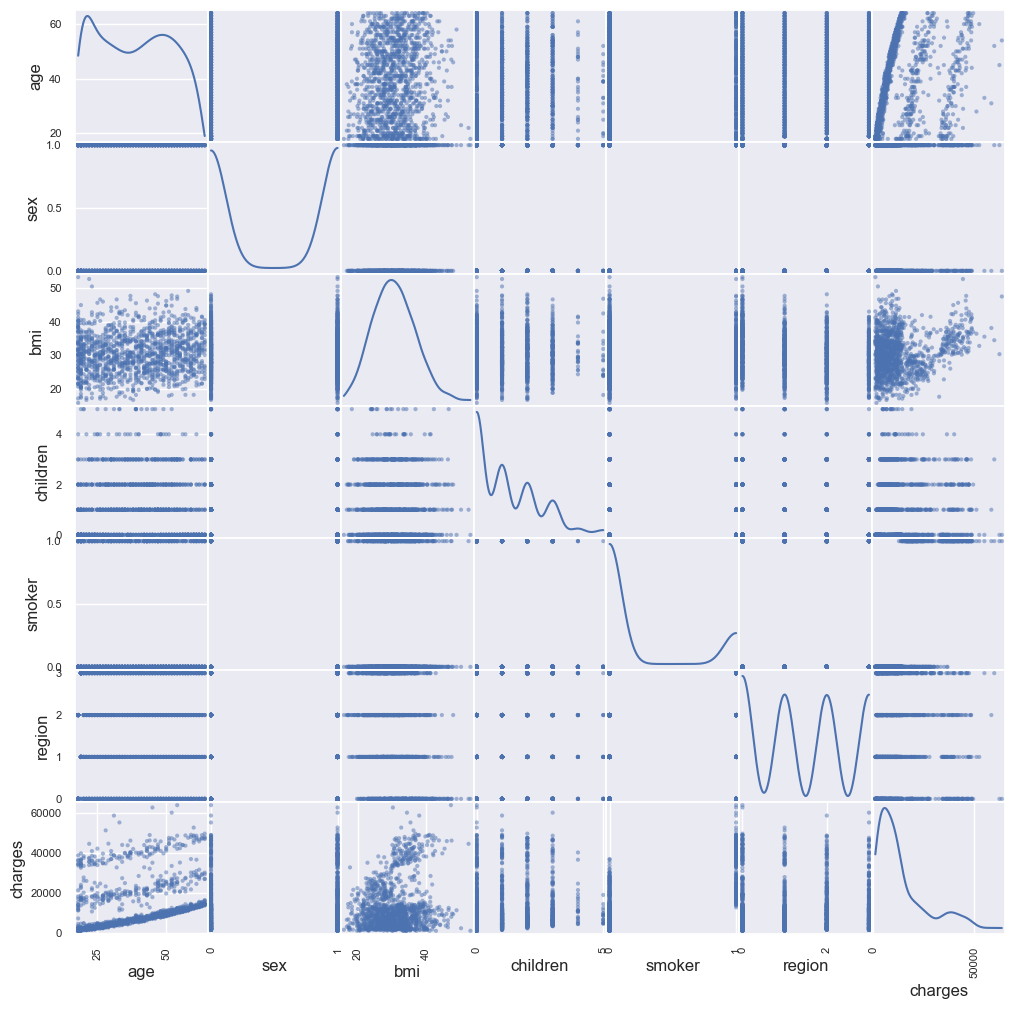

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(df , figsize=(12, 12) , diagonal='kde')
plt.show()

## **Feature Selection**

#### **1. Univariate Selection**

In [62]:
# Features and target
X = df[["age", "sex", "bmi", "children", "smoker", "region"]]
y = df["charges"]

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest
k = 5  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


#### **2. PCA**

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=len(df.columns) - 1) # Use all components
pca.fit(X_scaled)

# Get the components matrix
pca_components = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=[f"PC{i+1}" for i in range(len(df.columns) - 1)]
)

print("PCA Components Matrix:")
print(pca_components)

PCA Components Matrix:
          age       sex       bmi  children    smoker    region   charges
PC1  0.239547  0.106054  0.232212  0.070633  0.614044 -0.146756  0.688383
PC2  0.146202  0.026423  0.668765 -0.037983 -0.310133 -0.643605 -0.137212
PC3  0.721376 -0.382594  0.035462  0.425340 -0.267053  0.277977  0.049786
PC4 -0.091238  0.698853  0.038016  0.697020 -0.082082  0.061640 -0.073901
PC5  0.478494  0.585224  0.030034 -0.569836 -0.162289  0.276735 -0.004570
PC6 -0.323748 -0.103181  0.690015 -0.029459 -0.010920  0.636765  0.044308


In [65]:
# Compute feature importance
feature_importance = pca_components.sum(axis=0).sort_values(ascending=False)

# Select the top 3 features
top_3_features = feature_importance.head(5)
print("Top 3 Features based on PCA:")
print(top_3_features)

Top 3 Features based on PCA:
bmi         1.694504
age         1.170632
sex         0.930779
charges     0.566793
children    0.555715
dtype: float64


#### **3. Recursive Feature Elimination (RFE)**  

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Replace RandomForestClassifier with RandomForestRegressor
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')


### **Model Training & Standardisation de data**

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Features and target
X = df[["age","sex", "bmi", "children" , "smoker" ]]
y = df["charges"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=10)

# Initialize the base model and BaggingRegressor
base_model = DecisionTreeRegressor(random_state=10)
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=10, random_state=10)

# Train the BaggingRegressor
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 23889712.885303862
R² Score: 0.8223339764309989


In [68]:
# Example input data: (age, sex, bmi, children, smoker)
input_data = (31, 1, 36.300, 2, 1)

# Convert input data to a DataFrame with feature names
input_data_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker'])

# Apply the same scaler used during training
scaled_input_data = scaler.transform(input_data_df)  # This will now work without warnings

# Prediction
prediction = bagging_model.predict(scaled_input_data)

# Output the predicted insurance cost
print("The insurance cost is USD ", prediction[0])

The insurance cost is USD  42913.917979


In [69]:
import pickle  

In [70]:
pickle.dump(bagging_model , open('Medical_Inssurance_predictor.pkl' , 'wb'))

In [71]:
pickled_model = pickle.load(open('Medical_Inssurance_predictor.pkl' , 'rb'))

In [72]:
pickle.dump(scaler , open('scaling.pkl' , 'wb'))